# 화소 점처리(Point Processing)
1. Point Processing(포인트 처리) 정의<br><br>

2. 화소 산술연산<br>
    2-1 화소 overflow 처리<br><br>
    
3. LUT(Look up Table)<br>
    3-1 MultiplyLUT<br>
    3-2 BinaryLUT<br>
    3-3 InverseLUT<br>
    3-4 PosterLUT<br>
    3-5 GammaLUT<br><br>
        
4. Gamma Correction<br>
    4-1 gamma 수정을 한 후 이미지에 수정정보 삽입<br>
    4-2 GIF 파일로 만들기<br>
    4.3 이미지에 한글 폰트 사용<br><br>

5. PIL과 OpenCV 차이<br><br>

6. 역광처리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from PIL import ImageFont, ImageDraw, Image
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)

## 1. Point Processing 정의
   * 다른 화소의 영향을 받지 않고 단순히 화소 점의 값만 변경
   * 원 화소의 값이나 위치를 바탕으로 단일 화소 값을 변경
   * 산술연산, 논리연산, 광도보정, 명암 대비 스트레칭 등 기법 사용 가능

## 2. 화소의 산술연산
* 이미지 각 점에 +20, + 50을 더하는 화소의 산술연산이 가능하다.
* 단, 산술연산의 결과 pixel의 값이 255가 넘어가면 circular shift처럼 0 부터 count가 되기에 별도 처리를 해야한다. ex.240+30 = 15<br>
세번째 이미지가 이에 해당한다.

#### 참고사항
* 덧셈과 뺄셈 연산은 밝기가 어둡고 밝아지는 효과
* 곱셈연산 시 영상의 뚜렷함과 희미해는 선명도를 강조시킨다.(영상의 밝은 부분은 더욱 밝아지고, 어두운 부분은 약간 밝아져서 영상 내의 밝기에 커다란 차이가 생긴다.

(512, 512)
* 이미지 타입 :  <class 'numpy.ndarray'>


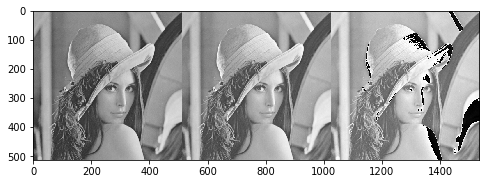

In [2]:
img = cv2.imread("./datas/Lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
print("* 이미지 타입 : ", type(img))

img2 = img + 20
img3 = img + 50

image = np.hstack([img, img2, img3])
plt.imshow(image, cmap='gray')
plt.show()

Img의 화소가 255가 넘어가면 이미지가 의도되지 않은 결과 발생
### 2-1 이미지 overflow 방지
* 해결 방법 : 클램핑 기법 -> np.clip 을 사용하여 해결
    * 연산의 결과 값이 최소값보다 작으면 그 결과 값을 최소값으로, 최대값보다 크면 결과 값을 최대값으로 하는 기법
    * 8비트 그레이 영상의 최소값은 0, 최대값은 255
    * 음수는 0으로 설정하고, 255보다 큰 값은 255로 설정함.

* 위를 이해하기 위한 간단한 예제 먼저 살펴보자(자료형변환과 np.clip함수 이해)

In [3]:
# 8비트(2^8 = 256)이기 때문에 overflow가 발생한다.
a = np.array([250, 254], dtype='uint8')
b = a + 10
print(b)

[4 8]


In [4]:
# 자료형 변환(8비트에서 16비트로)
a1 = np.array([250, 30, 254], dtype='int')
b1 = a1 + 10
print(b1)

[260  40 264]


In [5]:
# np.clip함수를 통해 255라는 임계치를 넘어가면 모두 255로 반환하게 함
c = np.clip(b1, 0, 255)
print(c)

[255  40 255]


In [6]:
# 우리는 이미지 영상을 다루기에 int형을 uint8형으로 재변환(256비트에 맞추기 위함)
d = np.array(c, dtype="uint8")
print(d)

[255  40 255]


In [7]:
# python list 자료구조는 자료형이 다를 수 있지만 numpy객체는 자료형이 하나로 통일(고속 처리를 위함)
e = [1, 1.0, 2]
print(type(e[0]))
print(type(e[1]))
print(type(e[2]))

f = np.array(e) # numpy 객체는 고속 처리를 위해 자료 타입을 동일 타입으로 맞춤(homogeneous)
print(type(f[0]))
print(type(f[1]))
print(type(f[2]))
#float64 = double type(8바이트), float은 보통 4바이트 이기 때문에

<class 'int'>
<class 'float'>
<class 'int'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


#### 형변환 후 np.clip 사용
* 4칙연산이 가능하면 대부분 선형(선의 기울기 변화, 선의 이동 등)
* 3차원에서 선형은 평면이다. 4차원은 공간
* 클램핑 기법은 비선형

(512, 512)
* 이미지 타입 :  <class 'numpy.ndarray'>
* [0, 0] img : <class 'numpy.uint8'>
* [0, 0] imgint : <class 'numpy.int32'>


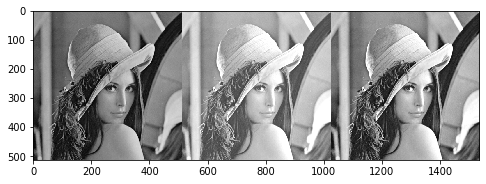

In [8]:
img = cv2.imread("./datas/Lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
print("* 이미지 타입 : ", type(img))
print("* [0, 0] img :",type(img[0,0]))
#imgint = np.array(img, dtype='int')    # 4바이트 연산
imgint = np.array(img, dtype='int') 
print("* [0, 0] imgint :",type(imgint[0,0])) 


img4 = img.astype(np.int)
img4 += 50

img4 = np.clip(img4 , 0, 255, out=img4)
img4 = img4.astype(np.uint8)
# 한줄로 표현 가능
img4 = np.clip(img4 , 0, 255).astype(np.uint8)


img5 = img.astype(np.float32)
img5 *= 1.2
img5 = np.clip(img5 , 0, 255).astype(np.uint8)

image = np.hstack([img,img4, img5])
plt.imshow(image, cmap='gray')
plt.show()

## 3. LUT(Look up Table)
* 일종의 ampping table이다.
* 화소 +5 해주세요 라고 하지 않고 LUT 테이블 만들어주세요 라고 필드에서 사용한다.

In [9]:
lut1 = [x for x in range(10)]
print(lut1)

lut2 = [x+5 for x in range(10)]
lut2 = np.clip(lut2, 5, 9)
print(lut2) #lut를 테이블로 만들어주세요! +5해주세요 안한다.

lut3 = [x+5 if x+5 < 10 else 9 for  x in range(10)]
print(lut3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5 6 7 8 9 9 9 9 9 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]


In [10]:
def addlut(op):
    return np.array([x+op if x+op < 255 else 255 for x in range(256)]).astype("uint8")

print(addlut(50))

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

In [11]:
def mullut(op):
    return np.array([x*op if x*op < 255 else 255 for x in range(256)]).astype('uint8')

print(mullut(1.5))

[  0   1   3   4   6   7   9  10  12  13  15  16  18  19  21  22  24  25
  27  28  30  31  33  34  36  37  39  40  42  43  45  46  48  49  51  52
  54  55  57  58  60  61  63  64  66  67  69  70  72  73  75  76  78  79
  81  82  84  85  87  88  90  91  93  94  96  97  99 100 102 103 105 106
 108 109 111 112 114 115 117 118 120 121 123 124 126 127 129 130 132 133
 135 136 138 139 141 142 144 145 147 148 150 151 153 154 156 157 159 160
 162 163 165 166 168 169 171 172 174 175 177 178 180 181 183 184 186 187
 189 190 192 193 195 196 198 199 201 202 204 205 207 208 210 211 213 214
 216 217 219 220 222 223 225 226 228 229 231 232 234 235 237 238 240 241
 243 244 246 247 249 250 252 253 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

### 3-1 multiplyLUT

[[219 219 218 ... 227 210 179]
 [219 219 218 ... 227 210 179]
 [219 219 218 ... 227 210 179]
 ...
 [ 68  68  76 ... 149 145 148]
 [ 68  68  83 ... 152 153 158]
 [ 68  68  83 ... 152 153 158]]


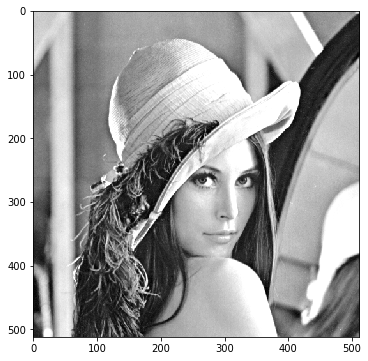

In [12]:
src1 = cv2.LUT(img, mullut(1.3))
print(src1)
plt.imshow(src1, cmap='gray')
plt.show()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [106 106 118 ... 230 224 228]
 [106 106 128 ... 234 236 244]
 [106 106 128 ... 234 236 244]]


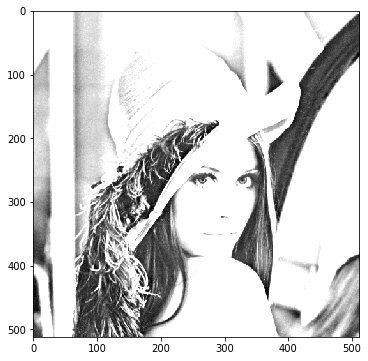

In [13]:
src2 = cv2.LUT(img, mullut(2.0))
print(src2)
plt.imshow(src2, cmap='gray')
plt.show()

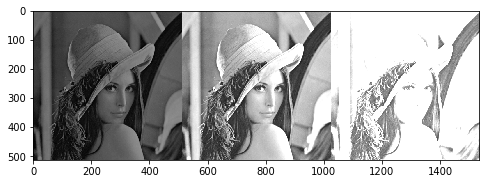

In [14]:
image = np.hstack([
    cv2.LUT(img, mullut(0.7)),
    cv2.LUT(img, mullut(1.3)),
    cv2.LUT(img, mullut(2.5))
    ])
plt.imshow(image, cmap='gray')
plt.show()

### 3-2. BinaryLUT

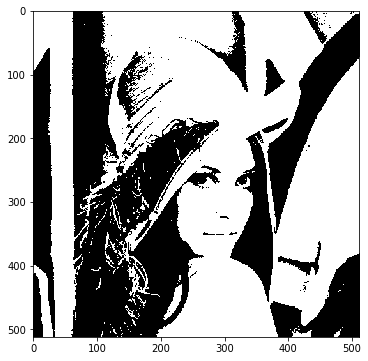

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [15]:
def binarylut(t):
    return np.array([255 if x > t else 0 for x in range(256)]).astype('uint8')

def binarylut2(t):
    return np.array([(x > t)*255 for x in range(256)]).astype('uint8')


src3 = cv2.LUT(img, binarylut(127))
plt.imshow(src3, cmap='gray')
plt.show()

print(src3)

### 3.3 InverseLUT

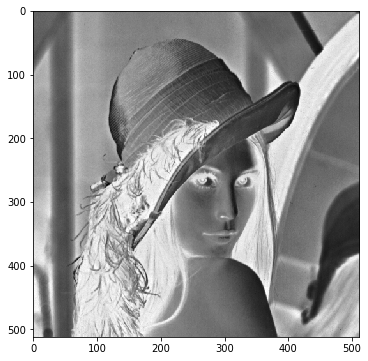

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


[[ 86  86  87 ...  80  93 117]
 [ 86  86  87 ...  80  93 117]
 [ 86  86  87 ...  80  93 117]
 ...
 [202 202 196 ... 140 143 141]
 [202 202 191 ... 138 137 133]
 [202 202 191 ... 138 137 133]]


In [16]:
def inverselut():
    return np.array([255-x for x in range(256)]).astype("uint8")

src3 = cv2.LUT(img, inverselut())
plt.imshow(src3, cmap='gray')
plt.show()

print(img)
print("\n")
print(src3)

#### 3.4 PosterLUT : 명암(화소)의 범위를 경계 값으로 나타냄(계단식)

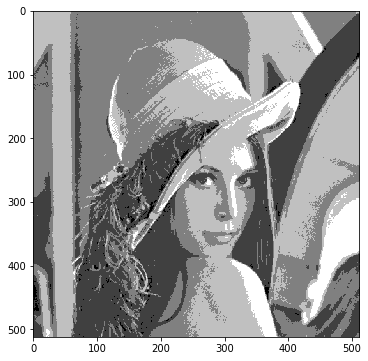

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 20

In [17]:
def poseterlut(t):
    return np.array([int(x/t)*t for x in range(256)]).astype("uint8")

src3 = cv2.LUT(img, poseterlut(50))
plt.imshow(src3, cmap='gray')
plt.show()

print(poseterlut(50))

### 3-5GammaLUT 
* 입력 값을 조정하여 출력을 제대로 만드는 과정 
* 감마 보정 함수 : Output(q) = [Input(p)](1/감마)
* 함수의 감마 값(감마)에 따라 영상을 밝게 하거나 흐리게 조절할 수 있음 
* 감마 값이 1보다 크면 영상이 어두워지고, 1보다 작으면 영상이 밝아짐
![gamma_function.png](./datas/gamma_function.png)

[[211 211 210 ... 214 207 192]
 [211 211 210 ... 214 207 192]
 [211 211 210 ... 214 207 192]
 ...
 [124 124 131 ... 177 175 176]
 [124 124 136 ... 178 179 182]
 [124 124 136 ... 178 179 182]]


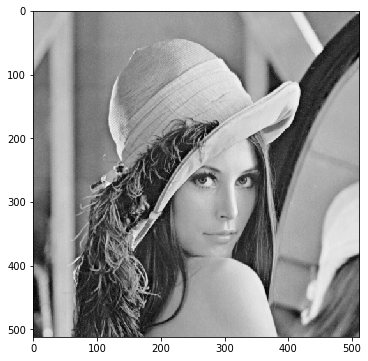

In [18]:
def gammalut(gamma):
    invGamma = 1.0 / gamma
    return np.array([((i/255.0) ** invGamma) * 255 for i in np.arange(0,256)]).astype("uint8")

src3 = cv2.LUT(img, gammalut(2.2))
plt.imshow(src3, cmap='gray')
print(src3)
plt.show()

## 4. Gamma Correction

### 4-1.gamma 수정을 한 후 이미지에 수정정보 삽입

In [19]:
img = cv2.imread("./datas/ironman.png")

col = cv2.LUT(img, gammalut(0.5))
cv2.putText(col, "gamma=0.5", (300,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0),2)
cv2.imwrite("./datas/gamma1.jpg",col)

col = cv2.LUT(img, gammalut(1.5))
cv2.putText(col, "gamma=1.5", (300,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0),2)
cv2.imwrite("./datas/gamma2.jpg",col)

col = cv2.LUT(img, gammalut(2.5))
cv2.putText(col, "gamma=2.5", (300,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0),2)
cv2.imwrite("./datas/gamma3.jpg",col)

True

<img src=./datas/gamma1.jpg width=300px style=float:left>
<img src=./datas/gamma2.jpg width=300px style=float:left>
<img src=./datas/gamma3.jpg width=300px style=float:left>

* 위의 내용을 아래와 같이 작성할수도 있다

### 4-2 GIF 파일로 만들기

In [20]:
img = cv2.imread("./datas/captainAmerica.png")

gm = [0.5, 1.2, 2.5, 3.0]
for i in range(len(gm)):
    col =cv2.LUT(img, gammalut(gm[i]))
    cv2.putText(col, f"gamma={gm[i]}", (100,30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,0),2)
    cv2.imwrite(f"./datas/cap_gamma{i+1}.png", np.hstack([img,col]))

In [21]:
from PIL import Image

im1 = Image.open('./datas/cap_gamma1.png')
im2 = Image.open('./datas/cap_gamma2.png')
im3 = Image.open('./datas/cap_gamma3.png')
im4 = Image.open('./datas/cap_gamma4.png')

im1.save("./datas/out1.gif", save_all=True, append_images=[im2, im3, im4],
        duration=1000, loop=0)
im1.save("./datas/out2.gif", save_all=True, append_images=[im2, im3, im4],
        duration=500, loop=5)

<img src = ./datas/out1.gif width=800>
<img src = ./datas/out2.gif width=800>

### 4.3 이미지에 한글 폰트 사용

In [22]:
from PIL import ImageFont, ImageDraw, Image # PIL 폴더 에서 imagefont class 참조해서 쓸게요

img = cv2.imread("./datas/captainAmerica.png")
imgPIL = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

font = ImageFont.truetype("C:/windows/fonts/HMKMMAG.TTF", 40)# 기본 비트맵 폰트 아닌 벡터폰트로 사용
draw = ImageDraw.Draw(imgPIL)

draw.text((450, 20), "캡틴 아메리카!", font=font, fill=(255,0,0))

imgPIL.save("./datas/caps.png")

<img src = ./datas/caps.png width=800>

## 5. PIL, OpenCV 비교
* PIL : 이미지 draw 목적(이미지 위에 그림)
* OpenCV : 영상처리 목적

## 6. 역광처리
* 부분적으로 LUT처리(값을 straching하고 밝은 부분은 그대로두고 어두운 부분만 발게)